# ***Simple Linear Regression on House Prices***

# Q
Şimdi, ilk regresyon modelinizi tasarlama sırası sizde. Bu bölümde, Kaggle'ın "Ev Fiyatları" veri kümesini kullanacaksınız. Bu veri kümesi, Ames/Iowa'da ki konutların birçok yönünü açıklayan 79 değişkenden oluşmaktadır. Göreviniz bu verileri kullanarak, evlerin fiyatlarını tahmin etmek olacak. 

Verileri ve değişkenlerin açıklamalarını burada bulabilirsiniz: [Ev Fiyatları](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

- Verileri inceleyin ve gerekli tüm verileri temizleyin.
- Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.
- Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.

---
## ***Ev Fiyatlari Veri Analizi***
- Veri setinin detayli analizi proje olarak [github adresimde](https://github.com/ahmetpergamum/datascience/blob/master/04_eda_project_house_prices/eda_house_prices.ipynb) mevcuttur.
- Veri analizi sonrasi olusturulmus temiz veri uzerinden devam edecegiz.

In [119]:
import pandas as pd
import numpy as np
# grafiksel araclar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# json dosyasina okuma yazma icin
import json
import math
# aykiri degerleri giderme icin
from scipy.stats.mstats import winsorize
# jb test icin
from scipy.stats import jarque_bera
from scipy.stats import normaltest
# ttesti ve anova icin
import scipy.stats as stats
# pca icin
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# lineer regresyon icin
from sklearn import linear_model
import statsmodels.api as sm

# path ile calismak icin
import sys
# dosyanin bulundugu dizini path e ekledik
mylib = '/home/admin1/datascience/datascience/library'
if mylib not in sys.path:
    sys.path.insert(1, mylib)

# parser i kullanabilmek icin
from data_description_parser import data_description_house_prices
data_dict = data_description_house_prices()

# uyarilari dikkate alma
import warnings
warnings.filterwarnings('ignore')

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# virgulden sonra belirli sayida basamak gosterimi icin 
pd.options.display.float_format = '{:,.3f}'.format

# font tanimlamalari
title_font = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}
axis_font  = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}

# temiz veri setini dataframe icerisine yukle
house_prices = pd.read_csv('data/house_prices_clean.csv',index_col='Id')

- Verilerde eksiklik yok.

In [98]:
print('\nHer bir degiskenin tipi:')
print('=======================================')
house_prices.info()


Her bir degiskenin tipi:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-nu

In [99]:
house_prices.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,"2,003.000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


- Hedef degiskenin dagilim grafigi.

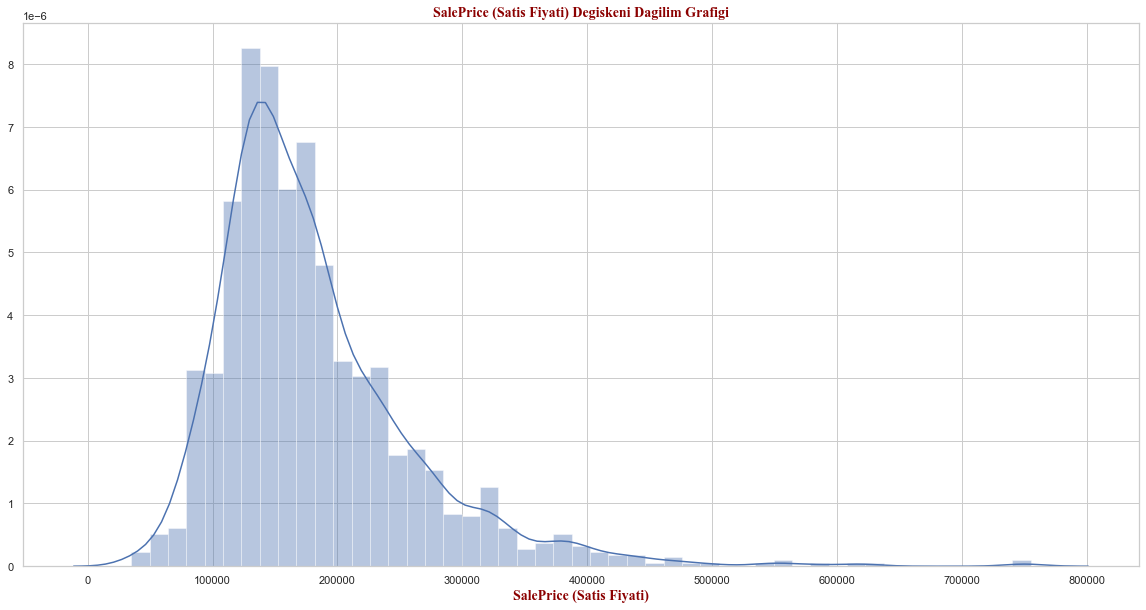

In [100]:
plt.figure(figsize=(20,10))
x=sns.distplot(house_prices['SalePrice'])
plt.xlabel('SalePrice (Satis Fiyati)', fontdict=axis_font)
plt.title('SalePrice (Satis Fiyati) Degiskeni Dagilim Grafigi', fontdict=title_font)
plt.show()

- Hedef degiskenin aykiri degerleri. Burada yuksek fiyatli evler ayri degerlendirilebilir.

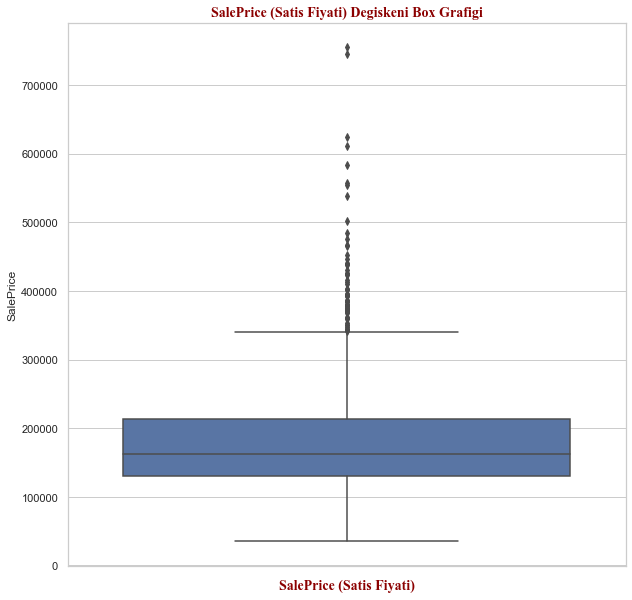

In [151]:
plt.figure(figsize=(10,10))
x=sns.boxplot(y=house_prices['SalePrice'])
plt.xlabel('SalePrice (Satis Fiyati)', fontdict=axis_font)
plt.title('SalePrice (Satis Fiyati) Degiskeni Box Grafigi', fontdict=title_font)
plt.show()

## ***Surekli degiskenlerle basit lineer regresyon***

- Surekli degiskenleri ayiralim. SalePrice ayrildiktan sonra toplam 36 adet surekli degisken mevcut

In [101]:
continuous_vars = [var for var in house_prices.columns if house_prices[var].dtype != 'object']
continuous_vars.remove('SalePrice')
len(continuous_vars)

36

***Scikit-Learn Yontemi***

- Hedef değişkeni olarak Y, ihtiyaç duyduğumuz ve formülüze edeceğimiz değerler için ise X değişkenini kullanıyoruz.

In [102]:
# hedef degiskeni
Y = house_prices['SalePrice']
# surekli degiskenler
X = house_prices[continuous_vars]

- Scikit-learn kütüphanesinden ```linear_model``` modülünü kullanarak bir LinearRegression modeli oluşturuyoruz. Daha sonra bu modele X ve Y değişkenlerimizi uygulayabiliriz.

In [103]:
# model nesnesi olusturuldu
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- ```lrm``` ismini verdiğimiz modelimiz bizim için buradaki beta değişkenlerini hesapladı. Sonuçlara bakabiliriz. Değişkenler (Coefficients) için ```.coef_``` ve sabit değer (Intercept) için ```.intersept_``` metodu bize istediğimiz sonuçları verecektir.

In [104]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-1.70182353e+02  2.00410358e+01  4.11595714e-01  1.72263246e+04
  4.93954334e+03  2.47349240e+02  1.11048124e+02  3.07628010e+01
  9.80355188e+00 -6.09568248e-01 -9.21192749e-02  9.10186436e+00
  1.92703138e+01  1.95085724e+01 -9.62566559e+00  2.91532205e+01
  9.33787215e+03  2.30297675e+03  3.34499597e+03 -1.80142293e+03
 -1.01606674e+04 -1.32833800e+04  4.92670030e+03  4.27120166e+03
  1.80137793e+02  1.24335022e+04 -6.12600869e+00  2.43927651e+01
 -4.38625324e+00  1.15284811e+01  1.90581878e+01  5.70847012e+01
 -3.31417829e+01 -5.83999279e-01 -4.30746111e+01 -7.92893367e+02]
Sabit değer (bias): 
 467147.68715647224


***StatsModels Yontemi***

- Statsmodels'e bias (intercept) değişkenini manuel olarak ekliyoruz.

In [105]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     183.2
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        09:29:12   Log-Likelihood:                -17317.
No. Observations:                1460   AIC:                         3.470e+04
Df Residuals:                    1425   BIC:                         3.489e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.671e+05   1.41e+06      0.331      0.740    -2.3e+06    3.23e+06
MSSubClass     -170.1824     26.680     -6.379      0.000    -222.518    -117.847
LotFrontage      20.0410     28.630      0.700      0.484     -36.121      76.203
LotArea           0.4116      0.101      4.095      0.000       0.214       0.609
OverallQual    1.723e+04   1188.160     14.498      0.000    1.49e+04    1.96e+04
OverallCond    4939.5433   1034.032      4.777      0.000    2911.155    6967.932
YearBuilt       247.3492     65.186      3.795      0.000     119.479     375.219
YearRemodAdd    111.0481     68.433      1.623      0.105     -23.193     245.289
MasVnrArea       30.7628      5.924      5.193      0.000      19.143      42.383
BsmtFinSF1        9.8036      2.525      3.883      0.000       4.851      14.756
BsmtFinSF2       -0.6096      4.500     -0.135      0.892      -9.438       8.218
BsmtUnfSF        -0.0921      2.407     -0.038      0.969      -4.814       4.630
TotalBsmtSF       9.1019      3.363      2.706      0.007       2.505      15.699
1stFlrSF         19.2703      6.171      3.123      0.002       7.166      31.375
2ndFlrSF         19.5086      5.719      3.411      0.001       8.291      30.727
LowQualFinSF     -9.6257     14.929     -0.645      0.519     -38.911      19.659
GrLivArea        29.1532      5.676      5.136      0.000      18.019      40.287
BsmtFullBath   9337.8721   2606.506      3.583      0.000    4224.871    1.45e+04
BsmtHalfBath   2302.9767   4081.799      0.564      0.573   -5704.003    1.03e+04
FullBath       3344.9960   2827.832      1.183      0.237   -2202.165    8892.157
HalfBath      -1801.4229   2658.749     -0.678      0.498   -7016.905    3414.059
BedroomAbvGr  -1.016e+04   1693.031     -6.001      0.000   -1.35e+04   -6839.567
KitchenAbvGr  -1.328e+04   5199.006     -2.555      0.011   -2.35e+04   -3084.853
TotRmsAbvGrd   4926.7003   1236.120      3.986      0.000    2501.889    7351.511
Fireplaces     4271.2017   1777.885      2.402      0.016     783.648    7758.755
GarageYrBlt     180.1378     58.204      3.095      0.002      65.963     294.313
GarageCars     1.243e+04   2902.567      4.284      0.000    6739.739    1.81e+04
GarageArea       -6.1260      9.796     -0.625      0.532     -25.342      13.090
WoodDeckSF       24.3928      7.995      3.051      0.002       8.709      40.076
OpenPorchSF      -4.3863     15.163     -0.289      0.772     -34.131      25.358
EnclosedPorch    11.5285     16.824      0.685      0.493     -21.474      44.531
3SsnPorch        19.0582     31.301      0.609      0.543     -42.343      80.460
ScreenPorch      57.0847     17.152      3.328      0.001      23.438      90.731
PoolArea        -33.1418     23.657     -1.401      0.161     -79.548      13.265
MiscVal          -0.5840      1.856     -0.315   

## ***Yuksek korelasyonlu surekli degiskenlerle basit lineer regresyon***

- Hedef degisken (SalePrice) ile en yuksek korelasyona sahip surekli degiskenler:
    - '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual'

- Hedef değişkeni olarak Y, ihtiyaç duyduğumuz ve formülüze edeceğimiz değerler için ise X değişkenini kullanıyoruz.

In [110]:
# yuksek korelasyonlu surekli degiskenler
high_corr = ['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']

# hedef degiskeni
Y = house_prices['SalePrice']
# surekli degiskenler
X = house_prices[high_corr]

***Scikit-Learn Yontemi***

- Scikit-learn kütüphanesinden ```linear_model``` modülünü kullanarak bir LinearRegression modeli oluşturuyoruz. Daha sonra bu modele X ve Y değişkenlerimizi uygulayabiliriz.

- ```lrm``` ismini verdiğimiz modelimiz bizim için buradaki beta değişkenlerini hesapladı. Sonuçlara bakabiliriz. Değişkenler (Coefficients) için ```.coef_``` ve sabit değer (Intercept) için ```.intersept_``` metodu bize istediğimiz sonuçları verecektir.

In [111]:
# model nesnesi olusturuldu
lrm = linear_model.LinearRegression()
# modelimizin denklemi (egrisi) olusturuluyor
lrm.fit(X, Y)

# degiskenler ve sabit(bias) deger
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [1.11859135e+01 2.43907676e+01 1.56639341e+01 1.45151932e+04
 4.31228864e+01 2.39970394e+04]
Sabit değer (bias): 
 -102650.90069028744


***StatsModels Yontemi***

- Statsmodels'e bias (intercept) değişkenini manuel olarak ekliyoruz.

In [112]:
# bias degerini manuel ekleriz
X = sm.add_constant(X)
# model egrisi olusturuluyor
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     775.0
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        09:30:37   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1453   BIC:                         3.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.027e+05   4903.994    -20.932      0.000   -1.12e+05    -9.3e+04
1stFlrSF       11.1859      5.032      2.223      0.026       1.315      21.057
TotalBsmtSF    24.3908      4.318      5.649      0.000      15.921      32.860
GarageArea     15.6639     10.475      1.495      0.135      -4.884      36.212
GarageCars   1.452e+04   3018.621      4.809      0.000    8593.872    2.04e+04
GrLivArea      43.1229      2.679     16.095      0.000      37.867      48.379
OverallQual    2.4e+04   1083.393     22.150      0.000    2.19e+04    2.61e+04
==============================================================================
Omnibus:                      431.781   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39208.253
Skew:                          -0.313   Prob(JB):                         0.00
Kurtosis:                      28.380   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ***Farklilik olusturan kategorik degiskenleri ekleyerek basit lineer regresyon***

- ***Neighborhood*** degiskeninde yuksek fiyat ozelligi gosteren uc mahalle diger mahallelerden ayrilarak one-hot encoding ile encode edildi.

In [121]:
# belirgin sekilde en yuksek fiyat ozelligi gosteren neighborhood degerleri
elite_neighborhood = ['NoRidge', 'NridgHt',  'StoneBr']
# list compherension ile diger mahalleleri ayri listeye alma
other_neighborhood = [val for val in  house_prices['Neighborhood'].unique() 
                      if val not in elite_neighborhood]

# encode edilen degisken ayri sutunda
house_prices['Neighborhood_E'] = house_prices['Neighborhood']

In [122]:
# replace ile elite neighboorhood degerlerini tek bir degere donusturme
for val in elite_neighborhood:
    house_prices['Neighborhood_E'].replace(to_replace=val, value=1, inplace=True)

# replace ile other neighboorhood degerlerini tek bir degere donusturme
for val in other_neighborhood:
    house_prices['Neighborhood_E'].replace(to_replace=val, value=0, inplace=True)
    
# veri tipi boolean olarak degistirildi ,gerekir mi???
# house_prices['Neighborhood'] = house_prices['Neighborhood'].astype('boolean')
# sutun adi degistirildi
# house_prices.rename(columns={'Neighborhood': 'elite_neighborhood'}, inplace=True)

In [123]:
interesting_vars = ['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 
                    'GarageCars', 'GrLivArea', 'OverallQual', 'Neighborhood_E']

# hedef degiskeni
Y = house_prices['SalePrice']
# surekli degiskenler
X = house_prices[interesting_vars]

***Scikit-Learn Yontemi***

In [124]:
# model nesnesi olusturuldu
lrm = linear_model.LinearRegression()
# modelimizin denklemi (egrisi) olusturuluyor
lrm.fit(X, Y)

# degiskenler ve sabit(bias) degeri
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [1.14033181e+01 1.99488157e+01 9.79115136e+00 1.40967113e+04
 4.15721836e+01 2.03827902e+04 5.08811387e+04]
Sabit değer (bias): 
 -75278.4765977641


***StatsModels Yontemi***

In [125]:
# bias (intercept) değişkenini manuel olarak ekliyoruz
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     773.6
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        09:35:01   Log-Likelihood:                -17410.
No. Observations:                1460   AIC:                         3.484e+04
Df Residuals:                    1452   BIC:                         3.488e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7.528e+04   5046.549    -14.917      0.000   -8.52e+04   -6.54e+04
1stFlrSF          11.4033      4.744      2.404      0.016       2.098      20.709
TotalBsmtSF       19.9488      4.084      4.885      0.000      11.939      27.959
GarageArea         9.7912      9.885      0.991      0.322      -9.598      29.181
GarageCars       1.41e+04   2845.856      4.953      0.000    8514.282    1.97e+04
GrLivArea         41.5722      2.528     16.442      0.000      36.613      46.532
OverallQual     2.038e+04   1055.701     19.307      0.000    1.83e+04    2.25e+04
Neighborhood_E  5.088e+04   3761.610     13.526      0.000    4.35e+04    5.83e+04
==============================================================================
Omnibus:                      391.935   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26063.733
Skew:                          -0.245   Prob(JB):                         0.00
Kurtosis:                      23.693   Cond. No.                     1.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- ***SaleCondition*** degiskeninde Partial evler digerlerinden ayrilarak one-hot encoding ile encode edildi.

In [129]:
data_dict['SaleCondition']

{'description': 'Condition of sale',
 'Normal': 'Normal Sale',
 'Abnorml': 'Abnormal Sale -  trade, foreclosure, short sale',
 'AdjLand': 'Adjoining Land Purchase',
 'Alloca': 'Allocation - two linked properties with separate deeds, typically condo with a garage unit',
 'Family': 'Sale between family members',
 'Partial': 'Home was not completed when last assessed (associated with New Homes)'}

In [130]:
# list compherension ile diger mahalleleri ayri listeye alma
not_partial = [val for val in  house_prices['SaleCondition'].unique() 
                      if val != 'Partial']

# encode edilen degisken ayri sutunda
house_prices['SaleCondition_E'] = house_prices['SaleCondition']


['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family']

In [131]:
# replace ile encoding
house_prices['SaleCondition_E'].replace(to_replace='Partial', value=1, inplace=True)
# replace ile not_partial degerlerini tek bir degere donusturme
for val in not_partial:
    house_prices['SaleCondition_E'].replace(to_replace=val, value=0, inplace=True)

In [135]:
interesting_vars = ['1stFlrSF', 'TotalBsmtSF', 'GarageCars', 'GrLivArea', 
                    'OverallQual', 'Neighborhood_E', 'SaleCondition_E']

# hedef degiskeni
Y = house_prices['SalePrice']
# surekli degiskenler
X = house_prices[interesting_vars]

***Scikit-Learn Yontemi***

In [136]:
# model nesnesi olusturuldu
lrm = linear_model.LinearRegression()
# modelimizin denklemi (egrisi) olusturuluyor
lrm.fit(X, Y)

# degiskenler ve sabit(bias) degeri
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [1.16080290e+01 1.88370783e+01 1.54235257e+04 4.27622291e+01
 1.94749398e+04 4.96693438e+04 2.06228326e+04]
Sabit değer (bias): 
 -69967.68893162376


***StatsModels Yontemi***

In [137]:
# bias (intercept) değişkenini manuel olarak ekliyoruz
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     794.6
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        09:40:20   Log-Likelihood:                -17394.
No. Observations:                1460   AIC:                         3.480e+04
Df Residuals:                    1452   BIC:                         3.485e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6.997e+04   5083.155    -13.765      0.000   -7.99e+04      -6e+04
1stFlrSF           11.6080      4.685      2.478      0.013       2.419      20.797
TotalBsmtSF        18.8371      4.032      4.672      0.000      10.929      26.746
GarageCars       1.542e+04   1648.500      9.356      0.000    1.22e+04    1.87e+04
GrLivArea          42.7622      2.507     17.058      0.000      37.845      47.680
OverallQual      1.947e+04   1055.161     18.457      0.000    1.74e+04    2.15e+04
Neighborhood_E   4.967e+04   3726.349     13.329      0.000    4.24e+04     5.7e+04
SaleCondition_E  2.062e+04   3642.227      5.662      0.000    1.35e+04    2.78e+04
==============================================================================
Omnibus:                      433.895   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31759.586
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                      25.833   Cond. No.                     1.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ***Aykiri degerler giderildikten sonra basit lineer regresyon***

- Yuksek fiyatli evler tamamen cikartililir.

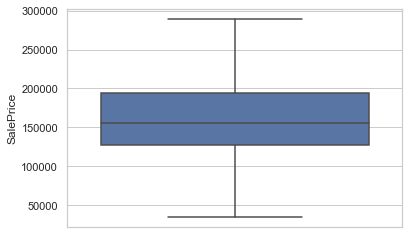

In [168]:
house_prices_cheap = house_prices[house_prices['SalePrice']<290000]

x = sns.boxplot(y=house_prices_cheap['SalePrice'])

In [172]:
interesting_vars = ['TotalBsmtSF', 'GarageCars', 'GrLivArea', 
                    'OverallQual', 'Neighborhood_E']

# hedef degiskeni
Y = house_prices_cheap['SalePrice']
# surekli degiskenler
X = house_prices_cheap[interesting_vars]

# bias (intercept) değişkenini manuel olarak ekliyoruz
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     684.9
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        10:07:28   Log-Likelihood:                -15501.
No. Observations:                1334   AIC:                         3.101e+04
Df Residuals:                    1328   BIC:                         3.105e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.019e+04   3872.054     -7.796      0.000   -3.78e+04   -2.26e+04
TotalBsmtSF       17.6154      2.115      8.329      0.000      13.466      21.764
GarageCars       1.63e+04   1246.497     13.080      0.000    1.39e+04    1.87e+04
GrLivArea         30.0993      1.926     15.628      0.000      26.321      33.878
OverallQual     1.769e+04    810.526     21.827      0.000    1.61e+04    1.93e+04
Neighborhood_E  2.216e+04   3628.515      6.106      0.000     1.5e+04    2.93e+04
==============================================================================
Omnibus:                      545.321   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11083.857
Skew:                          -1.390   Prob(JB):                         0.00
Kurtosis:                      16.845   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""